In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf
df = yf.download('005930.KS','2021-01-01','2023-10-01')
df.to_excel("삼성전자.xlsx")
df.to_csv("삼성전자.csv")

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-21,69200.0,69800.0,68800.0,68900.0,68900.0,10796336
2023-09-22,68300.0,68900.0,68300.0,68800.0,68800.0,9897840
2023-09-25,68500.0,69700.0,68500.0,69400.0,69400.0,13582516
2023-09-26,70000.0,70000.0,68400.0,68600.0,68600.0,13143470
2023-09-27,68600.0,69100.0,68200.0,68400.0,68400.0,14886491


In [4]:
df.shape

(677, 6)

In [5]:
data = df['Close'].values.reshape(-1, 1)

In [6]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [7]:
sequence_length = 10  # 10일 동안의 데이터를 이미지로 표현
image_data = []
target_data = []
for i in range(len(data) - sequence_length):
    sequence = data[i:i+sequence_length]
    image_data.append(sequence)
    target_data.append(data[i+sequence_length])

image_data = np.array(image_data)
target_data = np.array(target_data)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(sequence_length, 1, 1)))
model.add(MaxPooling2D((2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # 드롭아웃 추가
model.add(Dense(1, activation='linear'))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
model.fit(image_data, target_data, epochs=50, batch_size=32)

Epoch 1/50
21/21 [==============================] - 0s 456us/step - loss: 0.0512
Epoch 2/50
21/21 [==============================] - 0s 402us/step - loss: 0.0102
Epoch 3/50
21/21 [==============================] - 0s 354us/step - loss: 0.0079
Epoch 4/50
21/21 [==============================] - 0s 398us/step - loss: 0.0067
Epoch 5/50
21/21 [==============================] - 0s 414us/step - loss: 0.0061
Epoch 6/50
21/21 [==============================] - 0s 387us/step - loss: 0.0063
Epoch 7/50
21/21 [==============================] - 0s 402us/step - loss: 0.0066
Epoch 8/50
21/21 [==============================] - 0s 376us/step - loss: 0.0058
Epoch 9/50
21/21 [==============================] - 0s 419us/step - loss: 0.0059
Epoch 10/50
21/21 [==============================] - 0s 370us/step - loss: 0.0056
Epoch 11/50
21/21 [==============================] - 0s 592us/step - loss: 0.0047
Epoch 12/50
21/21 [==============================] - 0s 403us/step - loss: 0.0054
Epoch 13/50
21/21 [======

In [11]:
train_loss = model.evaluate(image_data, target_data, verbose=0)
print(f"훈련 손실: {train_loss:.5f}")

훈련 손실: 0.00094


In [12]:
predicted = model.predict(image_data)

21/21 [==============================] - 0s 337us/step


In [13]:
predicted = scaler.inverse_transform(predicted)
target_data = scaler.inverse_transform(target_data)

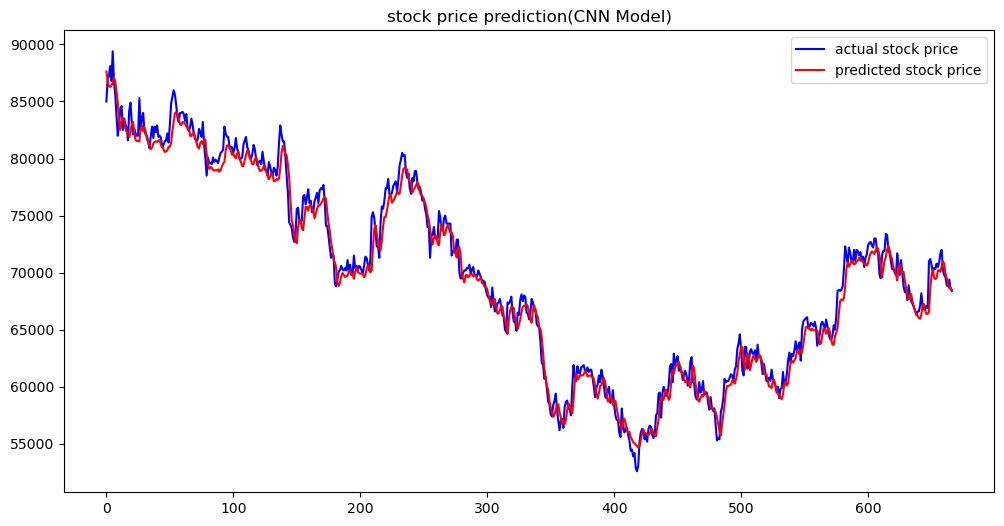

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(target_data, label='actual stock price', color='blue')
plt.plot(predicted, label='predicted stock price', color='red')
plt.title('stock price prediction(CNN Model)')
plt.legend()
plt.show()